#**Nama : Hadi Sahrul Fauzi**<br>
#**NIM  : 211351060<br>**
#**Kelas : Malam A**

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hadisahrul","key":"ad8d368aac7f7771abff79d245b0d7d6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d cpluzshrijayan/milkquality

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 2.41MB/s]


In [4]:
!mkdir milkquality
!unzip milkquality.zip -d milkquality
!ls milkquality

Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Data Discovery

In [6]:
data = pd.read_csv('milkquality/milknew.csv')
data.shape

(1059, 8)

In [7]:
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [32]:
data['Grade']=data['Grade'].map({'low':0,'medium':1,'high':2})
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6,35,1,0,1,0,254,2
1,6,36,0,1,0,1,253,2
2,8,70,1,1,1,1,246,0
3,9,34,1,1,0,1,255,0
4,6,37,0,0,0,0,255,1


In [42]:
X=data.drop(['Grade'],axis=1)
y=data['Grade']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [9]:
data.pH=data.pH.astype("int64")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pH          1059 non-null   int64 
 1   Temprature  1059 non-null   int64 
 2   Taste       1059 non-null   int64 
 3   Odor        1059 non-null   int64 
 4   Fat         1059 non-null   int64 
 5   Turbidity   1059 non-null   int64 
 6   Colour      1059 non-null   int64 
 7   Grade       1059 non-null   object
dtypes: int64(7), object(1)
memory usage: 66.3+ KB


# EDA (minimal 5)

<ipython-input-11-0a0cea474d03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

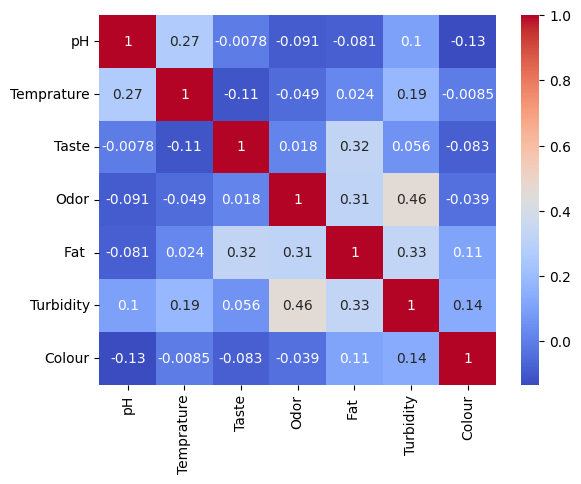

In [11]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='pH', ylabel='count'>

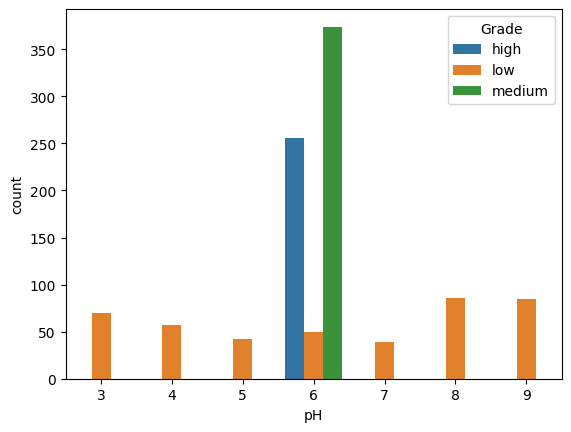

In [12]:
sns.countplot(x=data['pH'],hue=data['Grade'], palette = "tab10")

<Axes: xlabel='Odor', ylabel='count'>

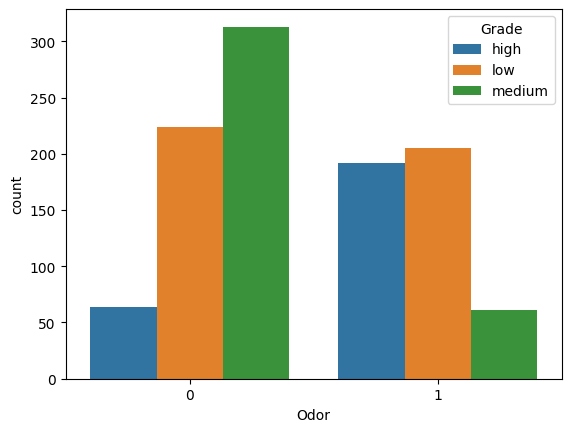

In [13]:
sns.countplot(x=data['Odor'],hue=data['Grade'], palette = "tab10")

<Axes: xlabel='pH', ylabel='Colour'>

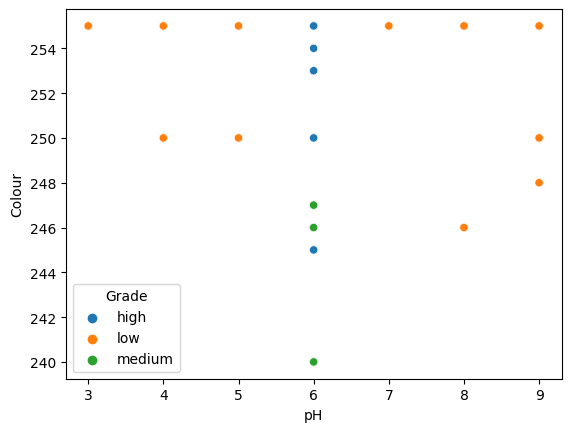

In [14]:
sns.scatterplot(data=data, x='pH', y='Colour', hue='Grade')

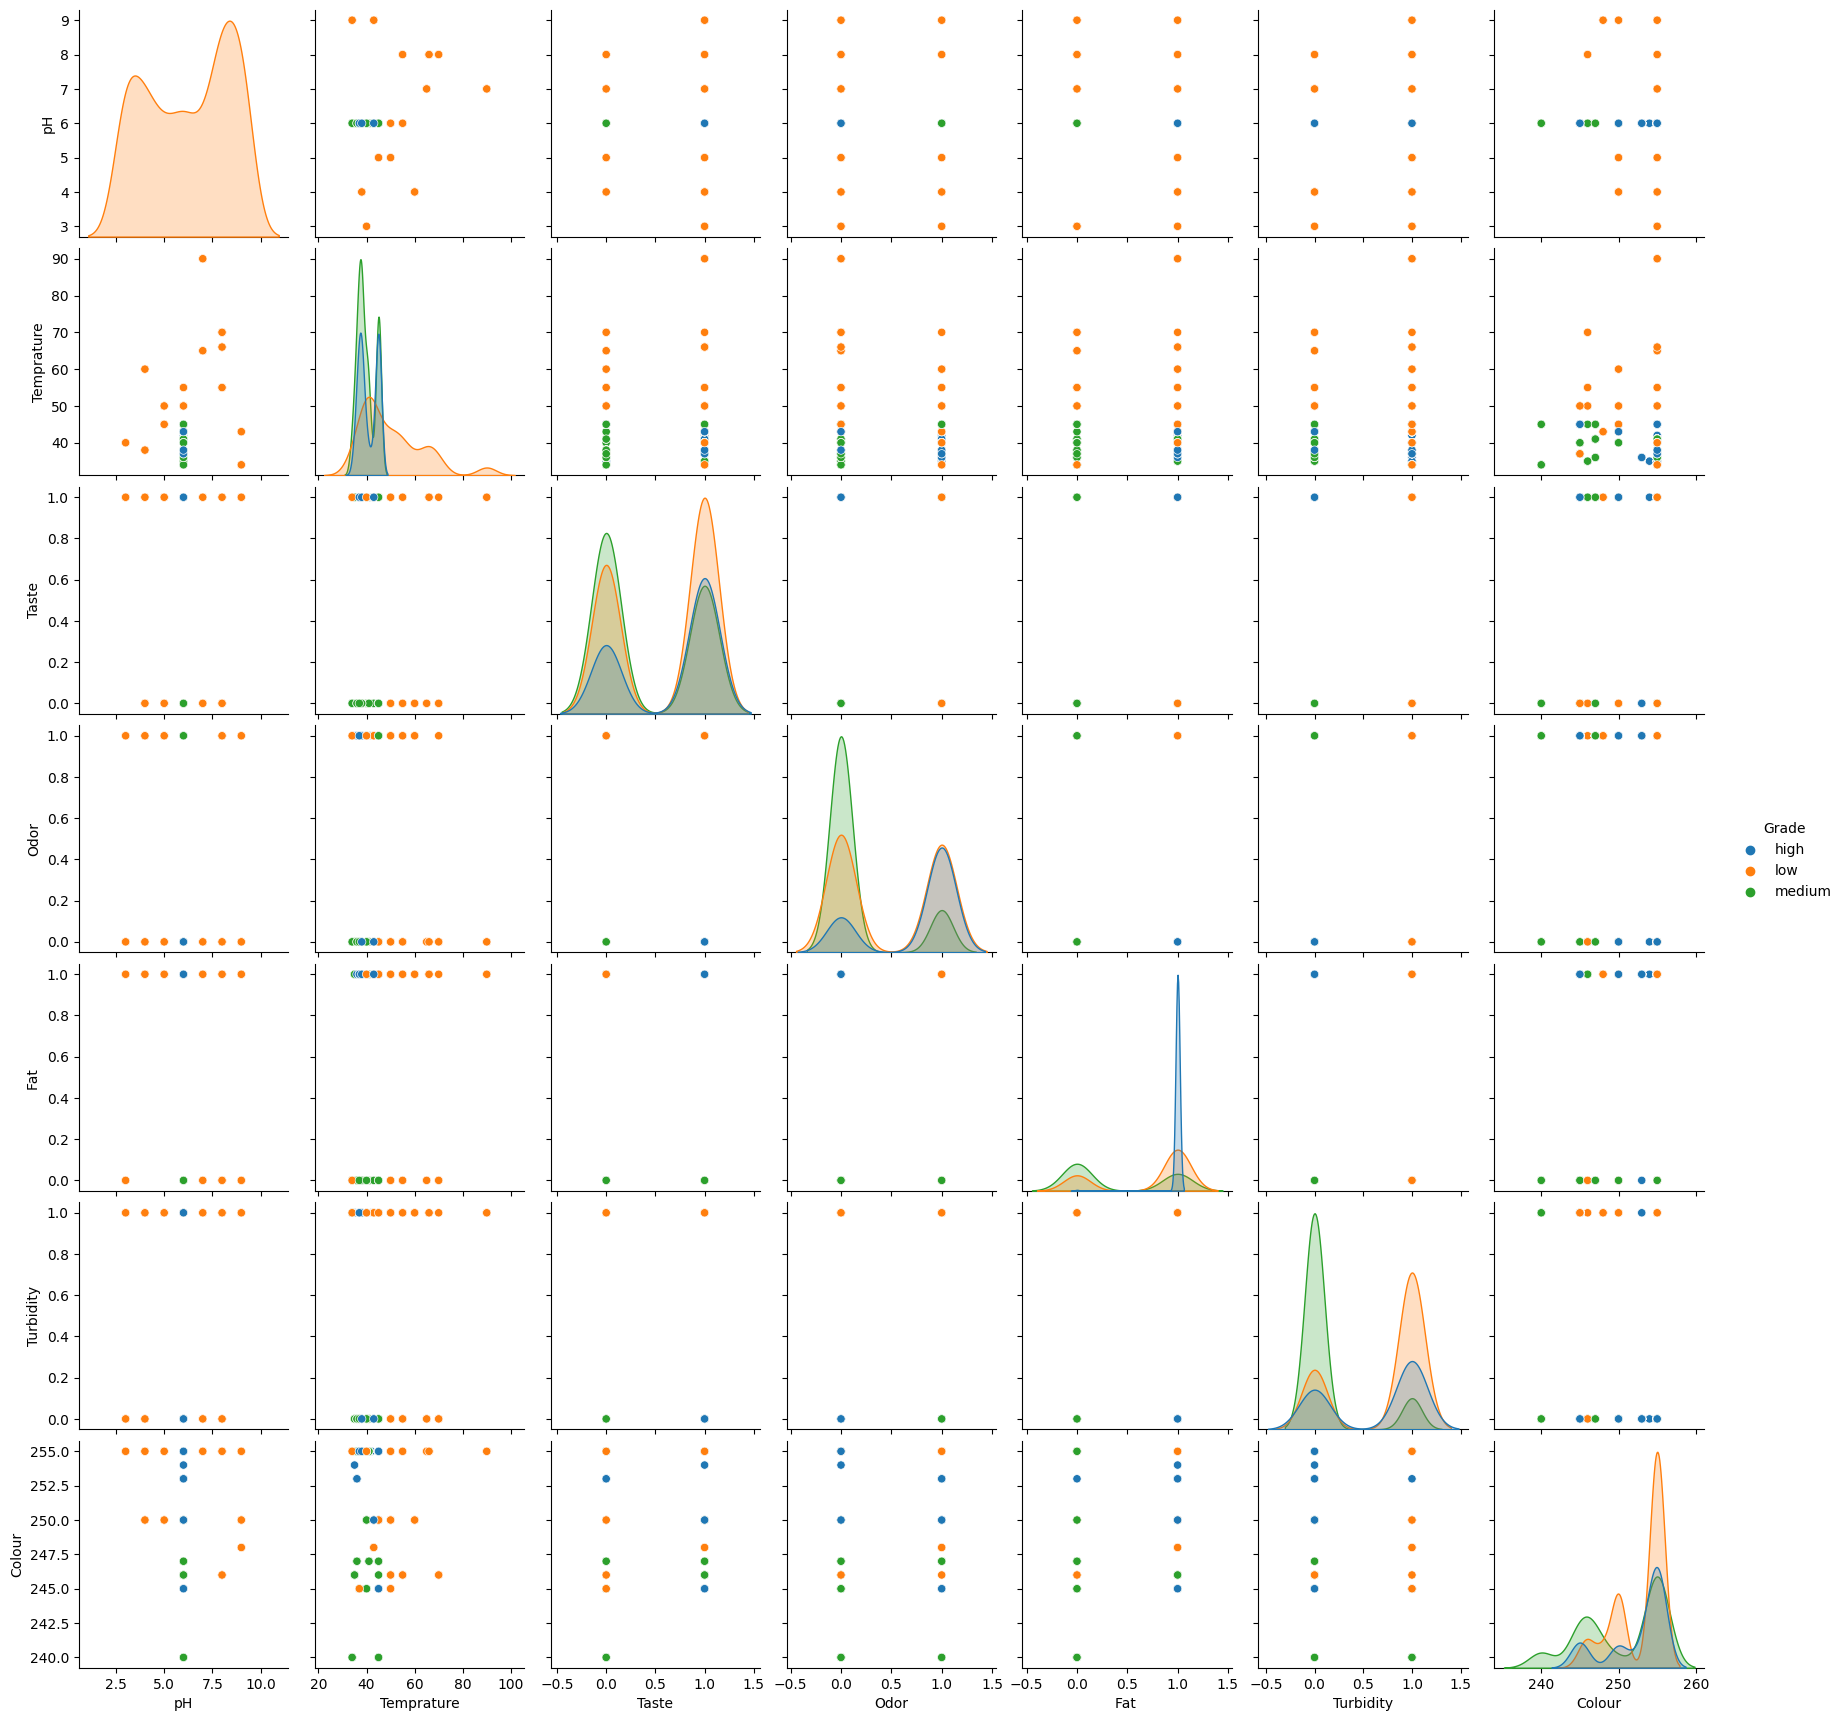

In [15]:
sns.pairplot(data,hue='Grade');

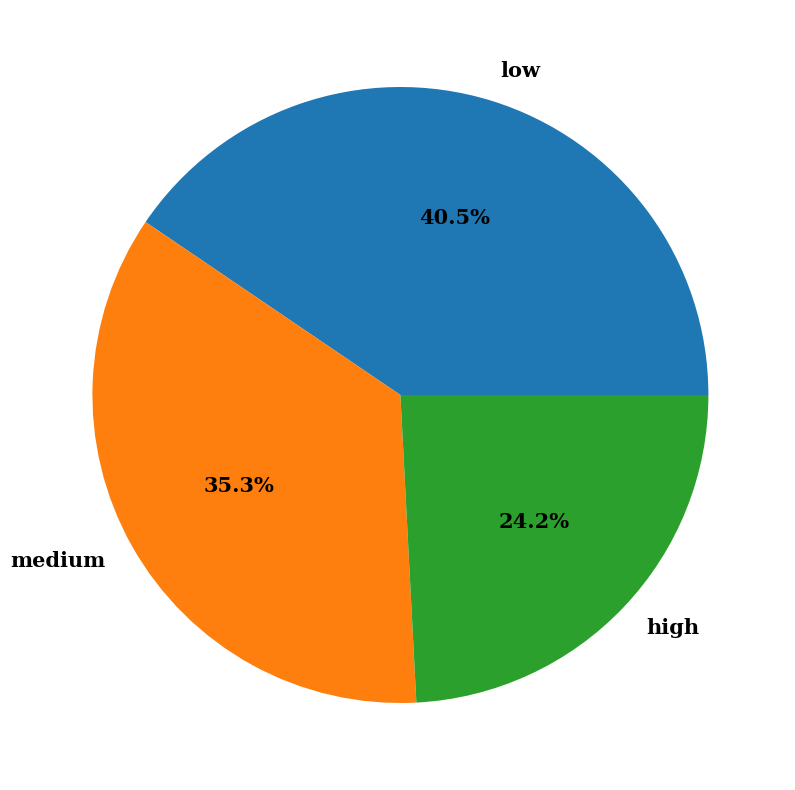

In [16]:
plt.figure(figsize=(30,10))
plt.pie(data['Grade'].value_counts(), labels=data['Grade'].value_counts().index,
          autopct='%1.1f%%', textprops={ 'fontsize': 15,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.show()

# Preprocessing

In [43]:
features = ['pH','Temprature','Taste','Odor','Fat ','Turbidity','Colour']
x = data[features]
y = data['Grade']
x.shape, y.shape

((1059, 7), (1059,))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=90)
y_test.shape

(265,)

# modeling

In [45]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)

In [46]:
score = model.score(x_test, y_test)
print('akurasi model knn = ', score)

akurasi model knn =  0.9509433962264151


In [47]:
input_data = np.array([[6.6, 35, 1, 0, 1, 0, 254]])

prediction = model.predict(input_data)
print('Prediksi kualitas susu :', prediction)

Prediksi kualitas susu : [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<bound method Axis.set_ticklabels of <matplotlib.axis.YAxis object at 0x792c830d9c60>>

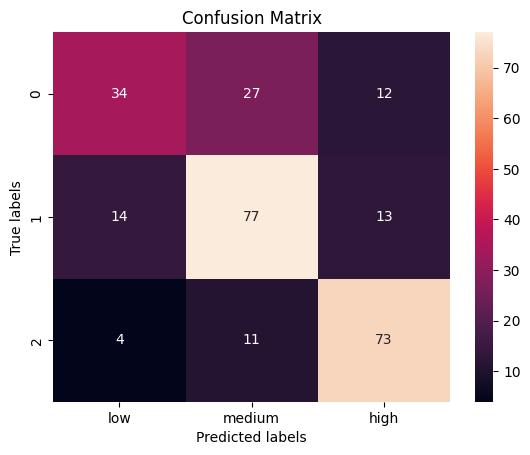

In [22]:
lr= linear_model.LogisticRegression(random_state = 42,max_iter= 100)
knn_preds = lr.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,knn_preds)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['low','medium','high']); ax.yaxis.set_ticklabels

# save model (pickle)

In [28]:
import pickle

filename = 'prediksi_milk.sav'
pickle.dump(lr,open(filename,'wb'))